# Load the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np

In [ ]:
# Load the two Excel files
order_data_path = 'Sample_Customore_Order raw.xlsx'
traffic_data_path = 'Sample_Customore_Traffic raw.xlsx'

# Reading the order data
order_data = pd.read_excel(order_data_path, sheet_name=1)

# Reading the traffic data
traffic_data = pd.read_excel(traffic_data_path)

# Order data

In [ ]:
order_data

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED
...,...,...,...,...,...,...,...,...,...,...,...
61723,30091,A000037831,1,2019-07-30,155000,119000,10000,0,0,Cash on Delivery,COMPLETED
61724,30511,A000037832,1,2019-07-30,475000,399000,10000,0,0,Cash on Delivery,COMPLETED
61725,30512,A000037833,1,2019-07-30,135000,99000,35641,0,0,Cash on Delivery,COMPLETED
61726,30513,A000037834,1,2019-07-30,350000,209000,0,0,0,VN Airpay Ibanking (Techcombank),CANCELLED


## EDA

In [ ]:
order_data.isna().sum()

,0
customer_unique_id,0
order_id,0
item_quantity,0
created_day,0
onsite_original_price,0
selling_price,0
shipping_fee,0
voucher_platform,0
voucher_seller,0
payment_method,0


In [ ]:
order_data['revenue'] =  (order_data['selling_price']*order_data['item_quantity']) + order_data['shipping_fee'] - (order_data['voucher_platform'] + order_data['voucher_seller'])
order_data

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,revenue
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED,262000
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED,139000
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED,373927
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED,214645
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED,143927
...,...,...,...,...,...,...,...,...,...,...,...,...
61723,30091,A000037831,1,2019-07-30,155000,119000,10000,0,0,Cash on Delivery,COMPLETED,129000
61724,30511,A000037832,1,2019-07-30,475000,399000,10000,0,0,Cash on Delivery,COMPLETED,409000
61725,30512,A000037833,1,2019-07-30,135000,99000,35641,0,0,Cash on Delivery,COMPLETED,134641
61726,30513,A000037834,1,2019-07-30,350000,209000,0,0,0,VN Airpay Ibanking (Techcombank),CANCELLED,209000


In [ ]:
order_data.duplicated().sum()

1897

In [ ]:
order_data.drop_duplicates(inplace=True)

In [ ]:
order_data.shape

(59831, 12)

In [ ]:
# Total Revenue for July
total_revenue = order_data['revenue'].sum()

print(f"The total revenue for all completed orders for July is: {total_revenue:.2f}")

The total revenue for all completed orders for July is: 10520692788.00


In [ ]:
# Total Revenue with complete status for July
completed_orders = order_data[order_data['order_status'] == 'COMPLETED']

# Calculate the total revenue for completed orders
completed_revenue = completed_orders['revenue'].sum()

print(f"The completed revenue for all completed orders for July is: {completed_revenue :.2f}")

The completed revenue for all completed orders for July is: 8383245742.00


In [ ]:
# Total Revenue with cancelle status for July
cancelled_orders = order_data[order_data['order_status'] == 'CANCELLED']

# Calculate the total revenue for completed orders
cancelled_revenue = cancelled_orders['revenue'].sum()

print(f"The cancelled revenue for all completed orders for July is: {cancelled_revenue:.2f}")

The cancelled revenue for all completed orders for July is: 2137447046.00


### Corelation heatmap

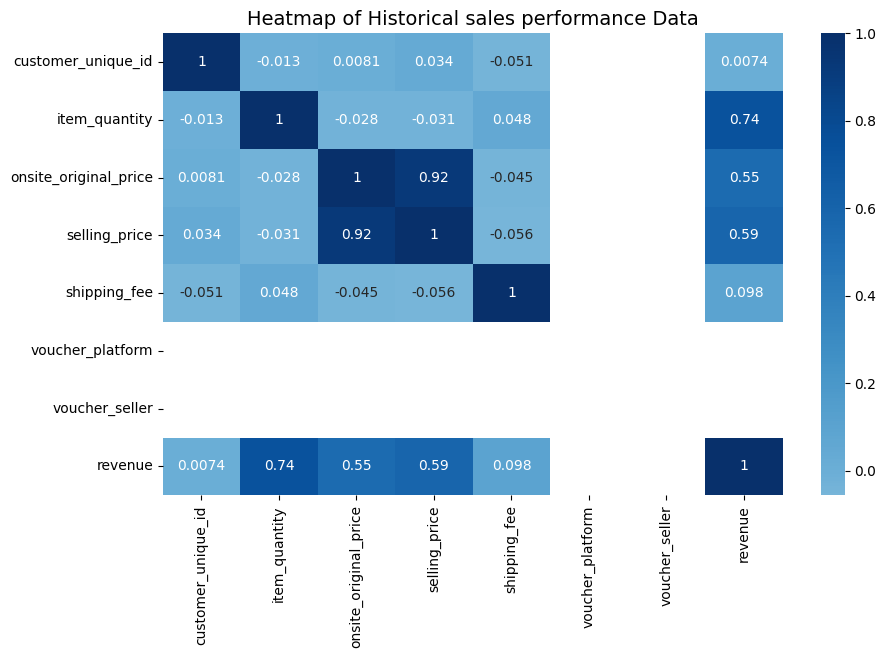

In [ ]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(order_data.corr(numeric_only=True), annot=True, cmap='Blues', center=0)
heatmap.set_title('Heatmap of Historical sales performance Data', fontdict={'fontsize':14})
plt.show()

- There is a very strong correlation between the original price and the post-promotion selling price, which is reasonable because the post-promotion selling price is based on the original price. However, this also suggests that promotions have a direct impact on selling prices.
- There is a strong correlation between post-promotion selling price and revenue, suggesting that price adjustments can have a big impact on revenue. Promotions or discounts can be powerful tools to boost sales.
- The item_quantity has a strong correlation with revenue, which suggests that selling more products per order can be an effective way to increase revenue.


### Create new df

Because each order will have many items, I grouped them and calculated the total number of items and value of that order

In [ ]:
# group
new_order_df = order_data.groupby(['customer_unique_id', 'order_id', 'created_day', 'shipping_fee', 'payment_method', 'order_status']).\
         agg({'item_quantity': 'sum', 'onsite_original_price': 'sum', 'selling_price': 'sum',  'revenue': 'sum'}).\
         reset_index()

new_order_df = new_order_df[['customer_unique_id', 'order_id', 'item_quantity', 'created_day', 'onsite_original_price', 'selling_price', 'shipping_fee', 'payment_method', 'order_status', 'revenue']]
new_order_df

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,payment_method,order_status,revenue
0,1,A000000001,1,2019-07-01,338000,259000,3000,Airpay GIRO,CANCELLED,262000
1,1,A000004553,1,2019-07-08,338000,229000,3000,Airpay GIRO,COMPLETED,232000
2,2,A000000002,2,2019-07-01,280000,234000,0,Cash on Delivery,COMPLETED,234000
3,3,A000000003,1,2019-07-01,520000,359000,14927,Cybersource,COMPLETED,373927
4,4,A000000004,1,2019-07-01,238000,185000,29645,Cash on Delivery,COMPLETED,214645
...,...,...,...,...,...,...,...,...,...,...
37830,30509,A000037825,1,2019-07-30,250000,179000,6500,VN Airpay Ibanking (BIDV),CANCELLED,185500
37831,30510,A000037827,1,2019-07-30,492000,389000,0,Cash on Delivery,COMPLETED,389000
37832,30511,A000037832,1,2019-07-30,475000,399000,10000,Cash on Delivery,COMPLETED,409000
37833,30512,A000037833,1,2019-07-30,135000,99000,35641,Cash on Delivery,COMPLETED,134641


### Order Completion Rate analysis

In [ ]:
# Calculate the percentage contribution of each order status
completed_percent = completed_revenue / total_revenue * 100
cancelled_percent = cancelled_revenue / total_revenue * 100

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=['Completed', 'Cancelled'],
                            values=[completed_percent, cancelled_percent])])

# Customize the layout
fig.update_layout(
    title='Revenue Contribution by Order Status',
    height=600,
    width=800
)

# Show the plot
fig.show()

- Comleted: Accounts for 79.7% of expected revenue: This is the largest percentage, showing that the majority of orders are successfully completed and bring main revenue to the company.

- Cancelled: Accounted for 20.3% of expected revenue: Actual revenue decreased to 8 billion VND from the expected 10 billion VND, due to the number of canceled orders. This is a significant area that needs improvement.

=> Propose: Reduce cancellation rates: Focus on improving order processes, inventory management, and optimizing delivery services to reduce the number of canceled orders. These measures can help increase revenue more realistically and effectively.

In [ ]:
# Calculate the average shipping fee for each order status
avg_shipping_fee = new_order_df.groupby('order_status')['shipping_fee'].mean()

# Create the stacked column chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['CANCELLED', 'COMPLETED'],
    y=avg_shipping_fee,
    text=avg_shipping_fee.values,
    textposition='auto',
    marker_color=['#EF553B', '#636EFA']
))

fig.update_layout(
    title='Average of shipping_fee by order_status',
    xaxis_title='order_status',
    yaxis_title='Average of shipping_fee',
    bargap=0.1
)

fig.show()

- For canceled orders: The average shipping cost is about 15,362 VND, significantly higher than for completed orders.

- For completed orders: The average shipping cost is only about 9,704 VND, lower than canceled orders.

- Analysis: The stark difference in shipping rates suggests that high shipping rates may be a significant factor affecting order cancellation rates. Customers may feel dissatisfied with high shipping fees, leading to them deciding to cancel their order.

- Propose: Companies should consider measures to manage and optimize shipping fees, such as offering free shipping options or reduced shipping fees to improve customer experience and reduce cancellation rates.  These improvements can help increase a company's revenue and profits.

### Revenue analysis

In [ ]:
# Calculate total revenue with completed status by day
sales_by_day = new_order_df.groupby('created_day')['revenue'].sum().reset_index()

# Convert 'created_day' to datetime format
sales_by_day['created_day'] = pd.to_datetime(sales_by_day['created_day'])

# Create the line chart
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sales_by_day['created_day'].dt.date,
    y=sales_by_day['revenue'],
    mode='lines+markers',
    line_color='rgb(158,202,225)',
    marker_color='rgb(158,202,225)'
))

fig.update_layout(
    title='Total Revenue by Day',
    xaxis_title='Day',
    yaxis_title='Total Revenue',
    xaxis_tickformat='%Y-%m-%d'
)

fig.show()

1. High Revenue Days:

The revenue increase from the beginning of the month to the middle of the month. And on July 12, stands out as a peak in revenue, likely due to a successful event, marketing campaign, or promotion. It could also be the result of launching a new product, service, or even a significant sale.

2. Low Revenue Days:

The revenue levels during the latter part of the period (July 21-28) appear to be lower compared to the earlier part of the period. Potential reasons could include:

- External Factors: Poor weather conditions, increased competition, or public holidays that affected consumer behavior.

- Internal Factors: Lack of effective promotions, insufficient marketing activity, or operational challenges (e.g., stock issues, website downtime).

The overall daily revenue trend shows fluctuations, with weekends (Saturdays and Sundays) generally having higher revenue compared to weekdays.


In [ ]:
# Calculate total revenue with completed status by day
sales_by_day = new_order_df.groupby('created_day')['selling_price'].mean().reset_index()

# Convert 'created_day' to datetime format
sales_by_day['created_day'] = pd.to_datetime(sales_by_day['created_day'])

# Create the line chart
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sales_by_day['created_day'].dt.date,
    y=sales_by_day['selling_price'],
    mode='lines+markers',
    line_color='rgb(158,202,225)',
    marker_color='rgb(158,202,225)'
))

fig.update_layout(
    title='Average selling price by Day',
    xaxis_title='Day',
    yaxis_title='Selling Price',
    xaxis_tickformat='%Y-%m-%d'
)

fig.show()

And after calculating the total sales for each day, I plotted the average price of the items for each day and could clearly see that on days when sales spiked (like the peak on July 12 or July 9 and July 28) also means that the average price of the items is very low, which makes it even more certain that discounts can be an important factor driving sales, confirming that discount and promotional campaigns have a strong impact on revenue.

In [ ]:
new_order_df['payment_method'].unique()

array(['Airpay GIRO', 'Cash on Delivery', 'Cybersource', 'Shopee Wallet',
       'Airpay Wallet V2', 'VN Airpay Ibanking (BIDV)',
       'VN Airpay Ibanking (Vietinbank)',
       'VN Airpay Ibanking (Vietcombank)',
       'VN Airpay Ibanking (Agribank)',
       'VN Airpay Ibanking (Techcombank)', 'VN Airpay Ibanking (HDbank)',
       'VN Airpay Ibanking (Sacombank)', 'VN Airpay Ibanking (DongAbank)',
       'Cybersource (new)', 'VN Airpay Ibanking (MB)',
       'VN Airpay Ibanking (MSbank)', 'VN Airpay Ibanking (Indovina)',
       'VN Airpay Ibanking (VPbank)', 'VN Airpay Ibanking (NCB)',
       'VN Airpay Ibanking (ACB)', 'VN Airpay Ibanking (Oceanbank)',
       'VN Airpay Ibanking (TPbank)', 'VN Airpay Ibanking (SGB)',
       'VN Airpay Ibanking (Eximbank)', 'VN Airpay Ibanking (SEAB)',
       'VN Airpay Ibanking (SHB)', 'VN Airpay Ibanking (OCB)',
       'VN Airpay Ibanking (VIB)', 'VN Airpay Ibanking (ABB)',
       'VN Airpay Ibanking (LPB)', 'VN Airpay Ibanking (PBVN)',
       'VN

In [ ]:
revenue_by_payment = new_order_df.copy()
revenue_by_payment['payment_method'] = revenue_by_payment['payment_method'].apply(lambda x: 'VN Airpay Ibanking' if x.startswith('VN Airpay Ibanking') else x)

# Group the data by payment method and order status, then calculate the total revenue
revenue_by_payment = revenue_by_payment.groupby(['payment_method', 'order_status'])['revenue'].sum().reset_index()

# Pivot the data to get a wide format
revenue_by_payment = revenue_by_payment.pivot(index='payment_method', columns='order_status', values='revenue').reset_index()

# Fill NaN values with 0
revenue_by_payment = revenue_by_payment.fillna(0)

# Create the double bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=revenue_by_payment['payment_method'], y=revenue_by_payment['COMPLETED'], name='COMPLETED'))
fig.add_trace(go.Bar(x=revenue_by_payment['payment_method'], y=revenue_by_payment['CANCELLED'], name='CANCELLED'))

fig.update_layout(
    title='Revenue by Payment Method',
    xaxis_title='Payment Method',
    yaxis_title='Revenue',
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(
        family="Arial",
        size=16,
        color="black"
    )
)

# Show the chart
fig.show()

1. Cash on Delivery: This payment method generates the highest revenue, accounting for the majority of total revenue. This shows that paying with cash is still the most popular choice for customers, possibly due to its familiarity, ease of access. But also high rate of canceled orders. This may reflect issues such as inconvenience in collecting cash, potential delivery failures, or mistrust in the delivery process.

2. Airpay Wallet V2, Airpay GIRO, and Cybersource: These payment methods also contribute an important part to revenue. This shows that digital wallets and bank transfers are increasingly popular. Low order cancellation rate proving that customers can trust these payment solutions and find it more convenient to pay online.

3. Other payment methods have a lower revenue contribution than the primary methods. This may indicate that adoption of new digital payment solutions remains limited, possibly due to customer hesitancy or lack of integration and promotion. In particular, the VN Airpay banking method has a higher cancellation rate than completion rate. This could be due to issues such as poor user experience, technical issues when trading, or a lack of trust in the method.


=> Strategies:
- Improved Cash on Delivery Payment Method:
  - Enhanced Delivery Process: Improved reliability and order tracking notifications to reduce the risk of cancellations.
  - Encourage Online Payments: Provide incentives for customers who choose to pay online to reduce cancellation rates.
- Encouraging Digital Wallets and Bank Transfers:
  - Promote and Enhance Experience: Promote these methods and ensure an easy and fast payment experience.
- Improved Other Payment Methods:
  - Increase Integration and Promotion: Invest in integrating and promoting less popular payment methods.
  - Fix Issues with VN Airpay Banking: Resolve issues related to this method to reduce cancellation rates.


### Order Quantity and Customer Behavior

In [ ]:
# Total orders in July
total_orders = new_order_df['order_id'].nunique()

# Calculate AOV
aov = completed_revenue / total_orders

print(f"Average Order Value (AOV): {aov:.2f}")

Average Order Value (AOV): 221573.83


The calculation reveals that the Average Order Value (AOV) for July is 221573.83 VND.

- Bundle Offers: Introduce bundle deals or promotions that encourage customers to spend more per order, which can directly boost the AOV.

- Free Shipping Thresholds: Set free shipping thresholds slightly above the current AOV (e.g., 300,000 VND) to incentivize customers to add more items to their cart to qualify.

- Loyalty Programs: Develop a loyalty program that rewards customers for their frequent or high-value purchases.

- Tiered Pricing or Volume Discounts: Consider offering tiered pricing or volume discounts to encourage customers to purchase in larger quantities. For example, provide a 5% discount for orders over 500,000 VND, or a 10% discount for orders over 1,000,000 VND.

# Traffic

In [ ]:
traffic_data.head()

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.621901,3.556041,176.025681,0.009079,6566,6.656088e+09
1,youtube / social,77785,55537,163447,0.788115,2.244324,89.944740,0.005855,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,0.553264,4.120340,200.429165,0.009656,1048,1.040851e+09
3,facebook / social,48721,32781,176662,0.844002,1.858996,73.206094,0.002830,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,0.639224,2.983563,148.443882,0.011963,508,4.025419e+08


## EDA

In [ ]:
traffic_data.isnull().sum()

,0
Source / Medium,1
Users,0
New Users,0
Sessions,0
Bounce Rate,0
Pages / Session,0
Avg. Session Duration,0
Ecommerce Conversion Rate,0
Transactions,0
Revenue,0


In [ ]:
traffic_data.drop(traffic_data.tail(1).index,inplace=True) # drop last n rows
traffic_data

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.621901,3.556041,176.025681,0.009079,6566,6.656088e+09
1,youtube / social,77785,55537,163447,0.788115,2.244324,89.944740,0.005855,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,0.553264,4.120340,200.429165,0.009656,1048,1.040851e+09
3,facebook / social,48721,32781,176662,0.844002,1.858996,73.206094,0.002830,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,0.639224,2.983563,148.443882,0.011963,508,4.025419e+08
...,...,...,...,...,...,...,...,...,...,...
192,web.start.fyi / local_display,1,0,22,0.363636,2.636364,237.818182,0.000000,0,0.000000e+00
193,www-dienmayxanh-com.cdn.ampproject.org / local...,1,0,1,1.000000,1.000000,0.000000,0.000000,0,0.000000e+00
194,xiaomiviet.vn / local_display,1,0,2,0.000000,4.500000,113.000000,0.000000,0,0.000000e+00
195,xnxx.com / local_display,1,0,2,0.500000,1.500000,6.000000,0.000000,0,0.000000e+00


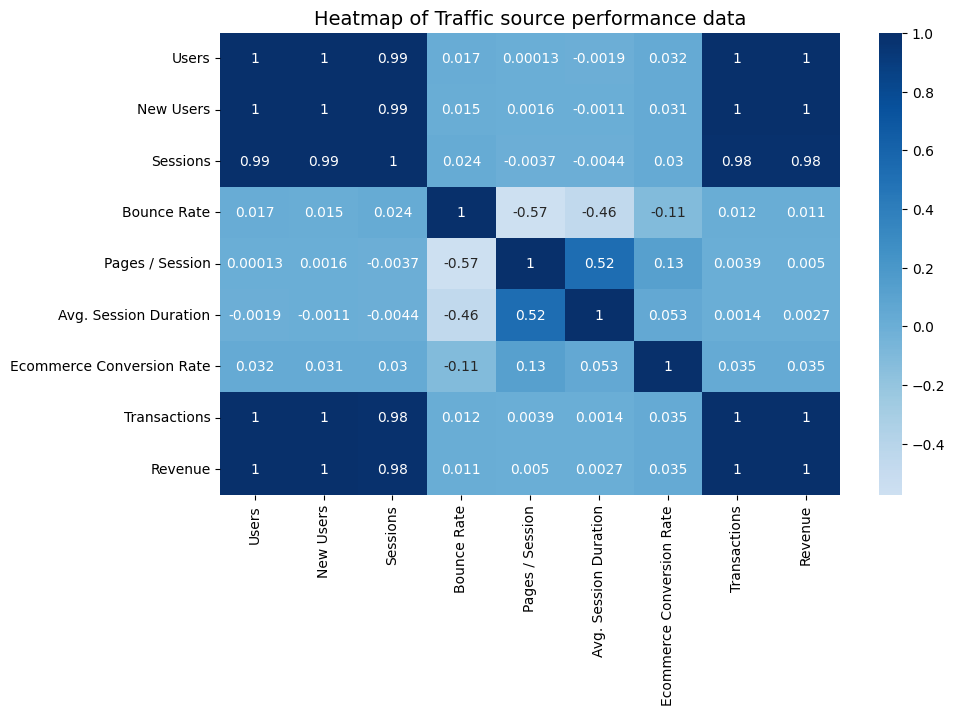

In [ ]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(traffic_data.corr(numeric_only=True), annot=True, cmap='Blues', center=0)
heatmap.set_title('Heatmap of Traffic source performance data', fontdict={'fontsize':14})
plt.show()

In [ ]:
# prompt: print corr matrix

traffic_data.corr(numeric_only=True)


,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
Users,1.000000,0.999062,0.992523,0.017306,0.000125,-0.001859,0.032097,0.998002,0.997083
New Users,0.999062,1.000000,0.988076,0.014806,0.001580,-0.001133,0.031472,0.999157,0.998846
Sessions,0.992523,0.988076,1.000000,0.023696,-0.003669,-0.004421,0.030448,0.984431,0.983645
Bounce Rate,0.017306,0.014806,0.023696,1.000000,-0.573411,-0.464566,-0.107963,0.012271,0.011177
Pages / Session,0.000125,0.001580,-0.003669,-0.573411,1.000000,0.521583,0.126407,0.003874,0.004978
Avg. Session Duration,-0.001859,-0.001133,-0.004421,-0.464566,0.521583,1.000000,0.053318,0.001378,0.002728
Ecommerce Conversion Rate,0.032097,0.031472,0.030448,-0.107963,0.126407,0.053318,1.000000,0.034682,0.034866
Transactions,0.998002,0.999157,0.984431,0.012271,0.003874,0.001378,0.034682,1.000000,0.999639
Revenue,0.997083,0.998846,0.983645,0.011177,0.004978,0.002728,0.034866,0.999639,1.000000


- The variables Users, New Users, and Sessions have very strong correlations with each other (correlation coefficients ~0.99). This indicates that as the number of users increases, the number of new users and sessions also increases. This is expected since the number of sessions is typically proportional to the number of users.

- Bounce Rate shows a very weak or even negative correlation with most other variables. Notably, it has a strong negative correlation with Pages/Session (-0.57) and Avg. Session Duration (-0.46), indicating that when the bounce rate is high, the number of pages per session and the average session duration tend to decrease. This makes sense because if users leave the site immediately, they won’t view many pages or spend much time on the site.

- Ecommerce Conversion Rate has a relatively weak correlation with other metrics, suggesting that it may be influenced by other factors not reflected in this data.

- Transactions, Users, New Users, and Sessions and Revenue have a very strong correlation with each other, which is expected growth in the number of users and sessions likely leads to an increase in revenue and the number of transactions.

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Users vs Revenue", "New Users vs Revenue",
                                    "Sessions vs Revenue", "Transactions vs Revenue"))

# Users và Revenue
fig.add_trace(go.Scatter(
    x=traffic_data['Users'],
    y=traffic_data['Revenue'],
    mode='markers',
    name='Users vs Revenue',
    marker=dict(size=10, color='blue')
), row=1, col=1)

# New Users và Revenue
fig.add_trace(go.Scatter(
    x=traffic_data['New Users'],
    y=traffic_data['Revenue'],
    mode='markers',
    name='New Users vs Revenue',
    marker=dict(size=10, color='green')
), row=1, col=2)

# Sessions và Revenue
fig.add_trace(go.Scatter(
    x=traffic_data['Sessions'],
    y=traffic_data['Revenue'],
    mode='markers',
    name='Sessions vs Revenue',
    marker=dict(size=10, color='red')
), row=2, col=1)

# Transactions và Revenue
fig.add_trace(go.Scatter(
    x=traffic_data['Transactions'],
    y=traffic_data['Revenue'],
    mode='markers',
    name='Transactions vs Revenue',
    marker=dict(size=10, color='purple')
), row=2, col=2)

# Cập nhật layout để có bố cục ma trận 2x2
fig.update_layout(
    showlegend=True,
    height=800,
    width=1000
)

fig.show()

We can clearly see a strong positive correlation between the above factors and revenue, so we can focus on these factors to boost revenue.

In [ ]:
# Transactions vs Revenue
fig = px.scatter(traffic_data, x='Transactions', y='Revenue', size='Users', color='Source / Medium',
                 title='Transaction, Users vs. Revenue by Source/Medium',
                 labels={'Transactions': 'Number of Transactions', 'Revenue': 'Revenue (VND)'},
                 hover_name='Source / Medium', size_max=60)

# Show plot
fig.show()

- "google / cpc" and "youtube / social" generate high transaction volume and high revenue. This shows that these channels not only attract many transactions but also bring in significant revenue, proving they are highly effective in converting users into transactions and revenue.

- "facebook / social", "youtube.com / referral", and "m.facebook.com / referral" have an average number of transactions but higher revenue compared to number of transactions . This shows that although the number of transactions is not the largest, each transaction from these channels brings in more revenue. This may suggest that these channels may attract higher value customers or have better pricing strategies.

- Channels that need improvement: "zalo / zalo", "youtube / (not set)", and "newsletter / email" have low transaction volume and revenue. This suggests that these channels may not be effective in attracting transactions or revenue. These channels may need improved marketing strategies or content optimization to increase effectiveness.

In [ ]:
# Sort the data by New Users and select the top 20 sources/mediums
top_20_data = traffic_data.sort_values(by='New Users', ascending=False).head(20)

# Create the bar chart
fig = go.Figure()

# Add bar trace for New Users
fig.add_trace(go.Bar(
    x=top_20_data['Source / Medium'],
    y=top_20_data['New Users'],
    name='New Users',
    marker_color='#EF553B'
))

# Add bar trace for Total Users
fig.add_trace(go.Bar(
    x=top_20_data['Source / Medium'],
    y=top_20_data['Users'],
    name='Users',
    marker_color='#636EFA'
))

# Update layout
fig.update_layout(
    title='Top 20 Sources/Mediums: New Users vs. Total Users',
    xaxis_title='Source / Medium',
    yaxis_title='Number of Users',
    barmode='group',
    xaxis_tickangle=-45
)

# Display the bar chart
fig.show()

- "google / cpc", "youtube / social", and "facebook / social" have very high numbers of new and total users. The ratio of new users to the total number of returning users is often higher than 50%, proving that these channels are very effective in reaching new customers and success in expanding the customer base, but consideration also needs to be given to retaining existing users.
- "newsletter / email", "yahoo / organic", and "bing / organic" have both a relatively low number of new users and total users. This suggests that these channels may not be effective in attracting new users or retaining existing users, and need improvement in terms of marketing and advertising strategies.
- The "(direct) / (none)" channel has mostly new users and few returning users, which shows: Ability to Attract New Customers: The website has a good ability to attract new customers, but does not retain them for long.

=> Focus on key channels such as "google / cpc", "youtube / social", "facebook / social" to attract and reach new customers effectively.

Prioritize the development of channels with good customer retention capabilities such as "youtube.com / referral", "m.facebook.com / referral" to increase the total number of users.

Effectively improve ineffective channels such as "newsletter / email", "yahoo / organic", "bing / organic" through optimizing content and improving user experience.



In [ ]:
# Sort the data by 'Sessions' in descending order and get the top 20
top_20 = traffic_data.sort_values('Sessions', ascending=False).head(20)

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Sessions', x=top_20['Source / Medium'], y=top_20['Sessions'])
])

# Update the layout
fig.update_layout(title='Top 20 Source/Medium: Sessions',
                  xaxis_title='Source / Medium', yaxis_title='Sessions',
                  height=600, width=1100)

# Show plot
fig.show()

Key Insights:
- Google / cpc is the dominant traffic source, generating over 650,000 sessions
- Facebook / social and YouTube / (direct) / (none) are the next highest traffic drivers
- Significant gap between top 3-4 sources and the rest
- Newer sources like newsletter, Instagram contribute lower sessions, but may have potential

Prioritize optimizing and scaling the top performing channels: Google Ads, Facebook/social, YouTube direct
Investigate opportunities to grow emerging sources as supplementary traffic drivers
Continuously monitor performance and adapt strategies based on evolving trends

In [ ]:
# Sort the data by 'Sessions' in descending order and get the top 20
top_20 = traffic_data.sort_values('Sessions', ascending=False).head(20)

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Bounce Rate', x=top_20['Source / Medium'], y=top_20['Bounce Rate'])
])

# Update the layout
fig.update_layout(
    title='Top 20 Source/Medium: Bounce Rate',
    xaxis_title='Source / Medium',
    yaxis_title='Bounce Rate',
    height=600,
    width=1100
)

# Show the plot
fig.show()